In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PhD/Linear regression/training_data.csv')
df

,word,speaker,emotion,time,position,target sentence,speaker gender,length,surprisal GPT,surprisal BERT,...,surprisal GPT 1.1,gpt 1.1 model,surprisal GPT 0.8,gpt 0.8 model,surprisal GPT 1.0,gpt 1.0 model,surprisal GPT 1.6,gpt 1.6 model,surprisal GPT 2.4,gpt 2.4 model
0,imamo,1,0,0.6,b,25,f,5.0,19.857792,3.380102,...,26.774665,0.381620,10.923071,0.383712,19.857792,0.382158,119.313482,0.382282,1303.269642,0.390894
1,još,1,0,0.1,m,25,f,3.0,31.651057,0.000163,...,44.712302,0.307226,15.860270,0.306565,31.651057,0.307289,251.548157,0.303015,3989.621629,0.292222
2,četiri,1,0,0.2,e,25,f,6.0,50.446848,0.000199,...,74.665063,0.499720,23.028584,0.495791,50.446848,0.498755,530.315666,0.497724,12212.418672,0.478888
3,minuta,1,0,0.8,e,25,f,6.0,22.568617,0.000554,...,30.821618,0.473795,12.100518,0.476996,22.568617,0.474685,146.422530,0.473555,1771.788431,0.485666
4,vremena do,1,0,0.3,e,25,f,9.0,32.872915,0.000472,...,46.614608,0.680453,16.348224,0.684812,32.872915,0.681710,267.264419,0.679304,4369.298518,0.696028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75781,kontaktu,1052,4,0.8,e,35,m,8.0,50.682962,0.004991,...,75.049566,0.605359,23.114771,0.604996,50.682962,0.605304,534.292624,0.604487,12350.051492,0.602952
75782,više,1052,4,0.4,e,35,m,4.0,33.920975,0.001764,...,48.251983,0.347345,16.763885,0.346900,33.920975,0.347292,281.027831,0.346465,4711.118164,0.345023
75783,od,1052,4,0.2,e,35,m,2.0,12.859425,0.000015,...,16.601362,0.215859,7.715734,0.215910,12.859425,0.215859,59.532551,0.215830,459.337332,0.214257
75784,godinu,1052,4,0.5,e,35,m,6.0,17.708307,0.000175,...,23.604497,0.441016,9.966476,0.441615,17.708307,0.441102,99.330649,0.442441,989.976552,0.445743


In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
gender = ['f', 'm']

for g in gender:
  print(f"For geneder {g}:")
  for emotion in [0,1,2,3,4]:
    data = df[df['speaker gender'] == g]
    data = data[data['emotion']== emotion]
    mse = mean_squared_error(data['baseline'], data['gpt model'])
    print(f"For emotion {emotion} mse is: {mse}")

For geneder f:
For emotion 0 mse is: 6.554200967855782e-05
For emotion 1 mse is: 6.362363514359097e-05
For emotion 2 mse is: 6.412974238077263e-05
For emotion 3 mse is: 6.69556404598092e-05
For emotion 4 mse is: 6.624171315619147e-05
For geneder m:
For emotion 0 mse is: 6.470691513005005e-05
For emotion 1 mse is: 6.413008662281863e-05
For emotion 2 mse is: 6.317403815477737e-05
For emotion 3 mse is: 6.505055082504525e-05
For emotion 4 mse is: 6.588336424025519e-05


In [146]:
import numpy as np
from scipy.stats import norm

def calculate_log_Likelihood(data):
    mean = np.mean(data)
    std_dev = np.std(data)

    # Calculate log-likelihood for each data point
    return norm.logpdf(data, loc=mean, scale=std_dev)

# Calculate AIC for models with different numbers of parameters
def calculate_aic(real_values, results, k):
    residuals = np.array(real_values) - np.array(results)
    log_likelihood = calculate_log_Likelihood(residuals)
    aic = 2 * k - 2 * log_likelihood
    return aic, np.mean(log_likelihood)

def akaike_for_column(column_name, model_name, baseline_model = 'baseline'):
    difference = []

    for gender in df[column_name].unique():

        data = df[df[column_name]==gender]

        _, aic_model1 = calculate_aic(data['time'], data[baseline_model], 2)
        _, aic_model2 = calculate_aic(data['time'], data[model_name], 3)

        #print(f"Difference: {aic_model1-aic_model2}")
        difference.append(aic_model1-aic_model2)

        # Compare AIC values
        #if aic_model1 < aic_model2:
        #    print(f"{baseline_model} is better according to AIC for {column_name} {gender}")
        #else:
        #    print(f"{model_name} is better according to AIC for {column_name} {gender}")

    return difference

2.0


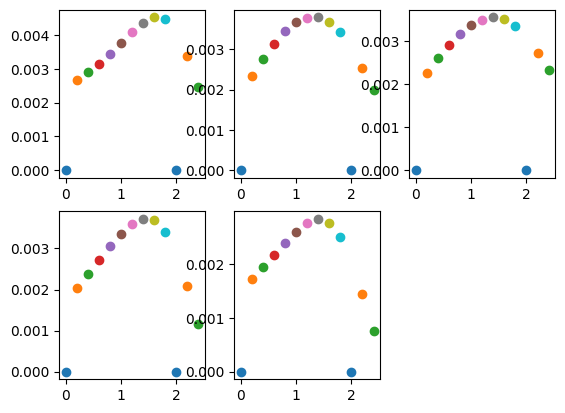

In [147]:
plt.figure()
for i in np.arange(0, 2.5, 0.2):
    k = round(i, 1)
    try:
      delta_ll = akaike_for_column('emotion', f"gpt {k} model", 'baseline')
    except:
      print(k)
      delta_ll = [0,0,0,0,0]
    for emotion in range(0,5):
      plt.subplot(2, 3, emotion + 1)
      plt.scatter(k, delta_ll[emotion])


In [148]:
akaike_for_column('emotion', 'gpt model')

[0.00376029348927899,
 0.003668305063441979,
 0.0033690524889772658,
 0.0033493943924417305,
 0.002601609533986665]

In [149]:
akaike_for_column('emotion', 'gpt model', 'gpt 0.2 model')

[0.0010832703975833108,
 0.0013297386036986887,
 0.0010999212212028132,
 0.0013184485284204687,
 0.0008695635160546611]

In [150]:
akaike_for_column('speaker gender', 'gpt model')

[0.0032667088303586847, 0.003270134987926325]

In [151]:
akaike_for_column('position', 'gpt model')

[0.001907389143808197, 0.006348928944100551, 0.004692765126294934]

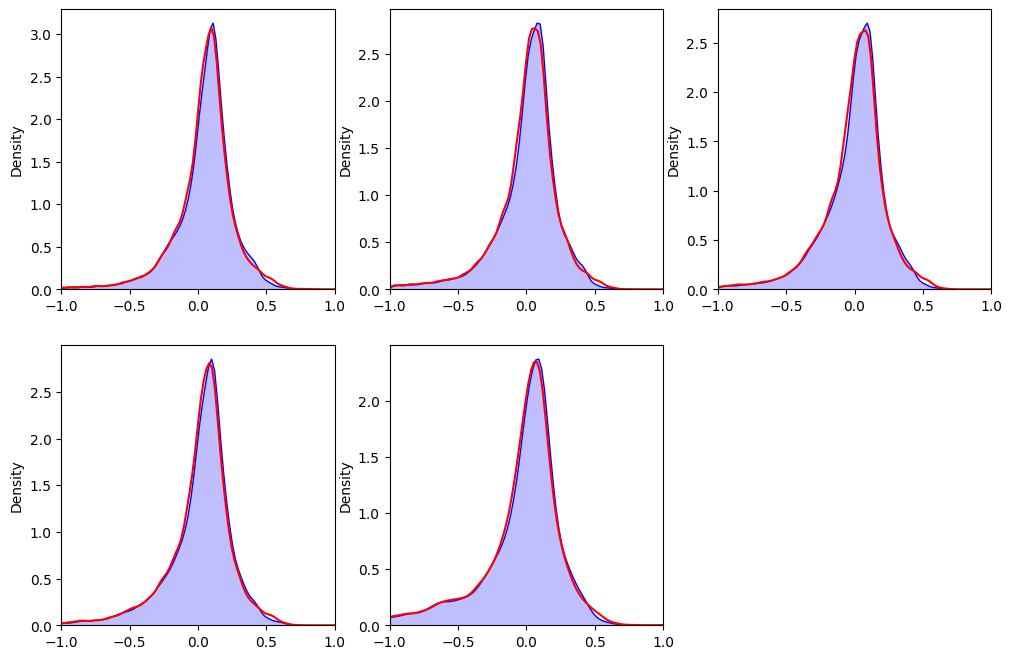

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

for i in range(0,5):
  plt.subplot(2,3,i+1)
  # Plot the distribution using a KDE plot
  residual_base = df[df['emotion'] == i]['baseline'] - df[df['emotion'] == i]['time']
  sns.kdeplot(residual_base, fill=True, color='blue')
  # Plot the distribution using a KDE plot
  residual = df[df['emotion'] == i]['bert model'] - df[df['emotion'] == i]['time']
  sns.kdeplot(residual, fill=False, color='red')
  plt.xlim([-1,1])